In [1]:
%store -r X

In [2]:
%store -r y

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
normalScaler = MinMaxScaler()

In [5]:
normalScaler.fit(X)

MinMaxScaler()

In [6]:
import pandas as pd

In [7]:
X_normalized = pd.DataFrame(normalScaler.transform(X))

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=48)

In [10]:
pca.fit(X_normalized)

PCA(n_components=48)

In [11]:
import numpy as np

In [12]:
coveredVariance = 0
optimalNumOfComponents = 48

x1 = []
y1 = []
x2 = []
y2 = []

for numOfComponents in range(1, 49):
    coveredVarianceByComponent = pca.explained_variance_ratio_[numOfComponents-1] * 100
    coveredVariance += coveredVarianceByComponent
    x1.append(f'pca{numOfComponents}')
    x2.append(f'{numOfComponents}')
    y1.append(coveredVarianceByComponent)
    y2.append(coveredVariance)
    print(coveredVariance, '        ', coveredVarianceByComponent)
    if coveredVariance > 99:
        optimalNumOfComponents = numOfComponents
        break
        
x1 = np.array(x1)
x2 = np.array(x2)
y1 = np.array(y1)
y2 = np.array(y2) 

69.60302282991901          69.60302282991901
92.29033744019901          22.687314610279994
94.30420964583497          2.013872205635963
96.01513148805907          1.7109218422240942
97.50598960706513          1.4908581190060661
97.96426645396198          0.45827684689685466
98.36412471185231          0.39985825789032253
98.72987443558719          0.3657497237348767
98.97332972852803          0.24345529294083884
99.1671825314179          0.1938528028898594


In [13]:
from matplotlib import pyplot as plt

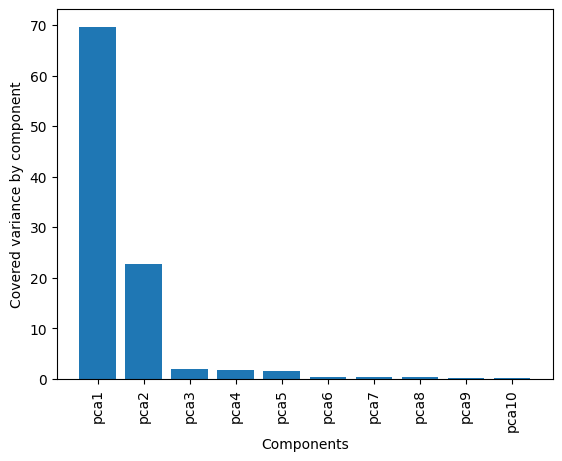

In [14]:
plt.bar(x1, y1)

plt.xlabel('Components')
plt.ylabel('Covered variance by component')

plt.rcParams["figure.figsize"] = (12,6)
plt.xticks(rotation=90)

plt.show()

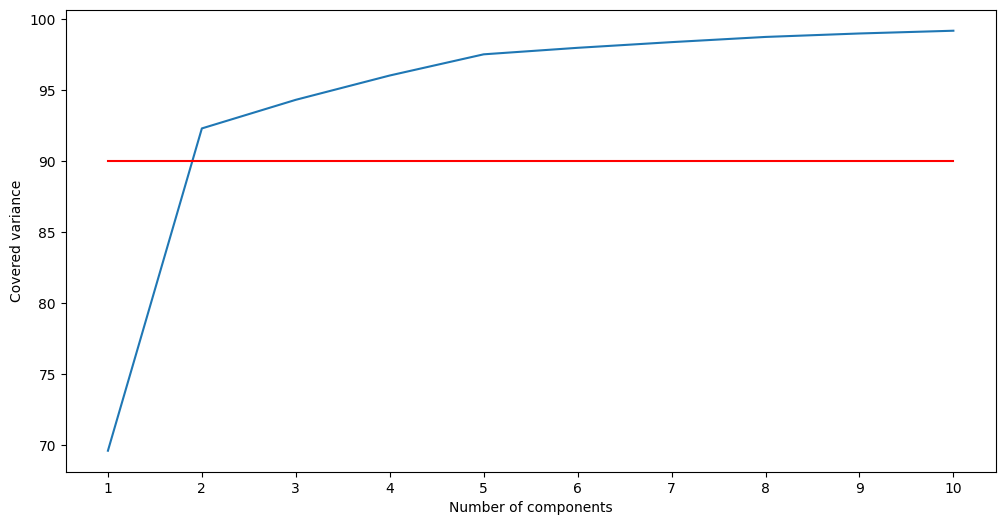

In [15]:
plt.plot(x2, y2)
plt.plot(x2, np.array([90 for i in range(len(y2))]), color='red')

plt.xlabel('Number of components')
plt.ylabel('Covered variance')

plt.show()

In [16]:
pca2 = PCA(n_components=2)

In [17]:
pca2.fit(X_normalized)

PCA(n_components=2)

In [18]:
X_PCA2 = pd.DataFrame(pca2.transform(X_normalized))

In [19]:
error_categories = pd.Categorical(y)

In [20]:
color_list = ['red', 'blue', 'green', 'yellow', 'pink', 'purple', 'orange', 'brown', 'gray', 'magenta', 'cyan']

In [21]:
from matplotlib.colors import ListedColormap

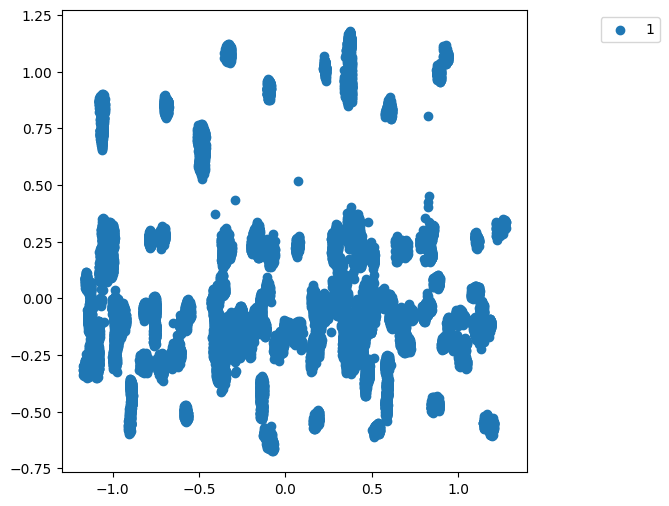

In [40]:
plt.scatter(X_PCA2.iloc[:, 0], X_PCA2.iloc[:, 1])
plt.rcParams["figure.figsize"] = (6,6)
plt.legend(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], bbox_to_anchor =(1.3, 1))

In [33]:
%store X_PCA2

Stored 'X_PCA2' (DataFrame)
Stored 'X_PCA3' (DataFrame)
